###Bitcoin Price Data Project

Download the file 'BTC\_prices.csv' (hourly price of Bitcoin from 2018 to mid-2020) and then move it to the folder you write your code in. Import the data into a numpy array called $prices$ and call its length n. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bitdata = np.genfromtxt('./data/BTC_prices.csv', delimiter = ',')
print(bitdata)

[6345.41 6346.39 6327.5  ... 9412.   9434.3  9427.05]


Make a plot of the prices. Add labels to the x and y axes (x axis is hours since July 1, 2018, and y-axis is BTC price in US Dollars). 

Text(0.5, 1.0, 'BTC prices')

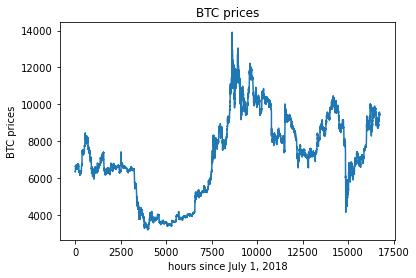

In [9]:
plt.figure()
plt.plot(range(len(bitdata)),bitdata)
plt.xlabel("hours since July 1, 2018")
plt.ylabel("BTC prices")
plt.title("BTC prices")

Make a numpy array called deltas that contains the price *changes*, so deltas will have length n-1. Can you do it without using a for loop?<br>


In [13]:
deltas = bitdata[1:] - bitdata[0:-1]

In [14]:
#len(bitdata[0:-1])
#len(bitdata[1:])
len(deltas)

16738

Calculate some meaningful statistics for those price changes: max, min, mean, variance, median, and upper and lower quartiles. 

In [25]:
minn = np.min(deltas)
print("min change is ", minn)
maxx = np.max(deltas)
print("max change is ", maxx)
meann = np.mean(deltas)
print("mean change is ", meann)
varr = np.var(deltas)
print("variance is ", varr)
mediann = np.median(deltas)
print("median is ", mediann)
quantiles25 = np.quantile(deltas, 0.25)
print("25% quantiales are ", quantiles25)
quantiles75 = np.quantile(deltas, 0.75)
print("75% quantiales are ", quantiles75)


min change is  -1339.3100000000004
max change is  1356.0699999999997
mean change is  0.18411040745608795
variance is  3792.9203871791115
median is  0.5199999999999818
25% quantiales are  -16.19749999999999
75% quantiales are  17.017500000000382


Next, create a mask for deltas that is 'True' for indices corresponding to when the price went down (negative price change). Create an array of the price changes that happen in the entry *after* the price went down, using that mask. What is the mean of those price changes?

In [31]:
mask = deltas < 0
deltas2 = deltas[1:]
entryafter = deltas2[mask[:len(mask)-1]]
len(entryafter)
entryafter.mean()


1.2699520177165393

16738

Use SciPy's stats module to run a t-test to compare those selected price changes versus the rest of the data of the price changes. 

In the above, we basically looked at the question "what happens to the price in the hour afer the price went down in the previous hour?". Use masks with other conditional statements you can think of to investigate other similar questions. For example: What do the price changes look like when the price went up in the previous *two* hours? 